### Testes básicos do funcionamento do CCScore

In [1]:
import sys
sys.path.append('../ccscore/')

import spacy
import pandas as pd
import pickle
import matplotlib
from infernal import feature_extraction as fe
from infernal import datastructures as ds
import confapp as config
config.TEP2_PATH = "../ccscore/data/tep2.pickle"

import helper_palavras as h_pal 
from text_document import TextDocument

In [2]:
PATH_CORPUS = "../ccscore/data/Corpus_Redacoes_Completo.pickle"

# Carrega a base de redações
df_redacao = pickle.load(open(PATH_CORPUS, 'rb'))
df_redacao

,Texto,Nota,Correção,Competência 1,Competência 2,Competência 3,Competência 4,Competência 5,Qtd palavras,Cadeias,Palavras,Erros,Entidades
0,Compreendemos como adolescentes sofrem variada...,350.0,~~Compreendemos~~ como adolescentes sofrem var...,50.0,100.0,100.0,50.0,50.0,417,"{'Cadeia_7': {'sn': [OrderedDict([('@id', '7')...",\nCompreendemos \t[compreender] <fmc> <*> <vH>...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,{'preconceitos': {'label': 1654488180927486347...
1,"A questão do bullying na escola, é um fenômeno...",450.0,"A questão do bullying na escola, (Sem vírgula)...",100.0,100.0,100.0,100.0,50.0,268,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nquest...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'pessoa': {'label': 16544881809274863474, 'kb..."
2,O tema que repercute o mundo desde muito tempo...,250.0,O tema (Qual? Deixe essa ideia evidente) que r...,50.0,50.0,50.0,50.0,50.0,291,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nO \t[o] <*> <artd> DET M S @>N #1->2\ntema ...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,{'língua inglesa': {'label': 16544881809274863...
3,Muito se tem falado sobre o bullying. Estudado...,400.0,Muito se tem falado sobre o bullying. Estudado...,100.0,100.0,50.0,100.0,50.0,416,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nMuito \t[muito] <*> <quant> ADV @ADVL> #1->...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'lugar': {'label': 16544881809274863474, 'kb_..."
4,"Nossa história é feita de guerras, confrontos,...",250.0,"~~Nossa ~~história é feita de guerras, confron...",50.0,50.0,50.0,50.0,50.0,275,"{'Cadeia_2': {'sn': [OrderedDict([('@id', '2')...",\nNossa \t[nosso] <poss 1P> <*> DET F S @>N #...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,{'classes sociais': {'label': 1654488180927486...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,"A busca pelo grande amor via internet, tem se ...",600.0,"A busca pelo grande amor via internet, tem se ...",150.0,100.0,100.0,100.0,150.0,367,"{'Cadeia_5': {'sn': [OrderedDict([('@id', '5')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nbusca...,[[space:EXTRA_AFTER_LEFT_PUNCT] Excesso de esp...,"{'estado': {'label': 16544881809274863474, 'kb..."
5072,Já estamos acostumados a nos esconder atrás de...,650.0,Já estamos acostumados a nos esconder atrás de...,150.0,150.0,100.0,150.0,100.0,344,"{'Cadeia_4': {'sn': [OrderedDict([('@id', '4')...",\nJá \t[já] <*> <setop> <atemp> ADV @ADVL> #1...,[[punctuation:BEFORE_SENTENCES] Pontuação no i...,"{'Internet': {'label': 7654241940133152407, 'k..."
5073,As salas de bate-papo estão entre as páginas d...,650.0,As salas de bate-papo estão entre as páginas d...,150.0,100.0,100.0,150.0,150.0,253,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nAs \t[o] <*> <artd> DET F P @>N #1->2\nsala...,[[xml:124] O adjetivo na função de predicativo...,{'páginas da internet': {'label': 165448818092...
5074,No mundo globalizado em que vivemos a internet...,500.0,No mundo globalizado em que vivemos a internet...,150.0,100.0,100.0,100.0,50.0,315,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nEm \t[em] <*> <sam-> PRP @ADVL> #1->7\no \t...,[[xml:118] Verificou-se erro de concordância e...,"{'Universidade de Cornell': {'label': 385, 'kb..."


In [3]:
num_redacao = 320
texto = df_redacao['Texto'][num_redacao]
anot_pal = df_redacao['Palavras'][num_redacao]
nota_compt4 = df_redacao['Competência 4'][num_redacao]

print(f"Num.: {num_redacao}\nCompetência 4: {nota_compt4}")

print(texto)



Num.: 320
Competência 4: 150.0
Um país pioneiro na produção de biocombustíveis, na obtenção de quase toda sua energia elétrica por meio hidráulico, na implantação de projetos com energia eólica, no desenvolvimento e divulgação da energia mais limpa do mundo, a energia solar, bem esse é o nosso Brasil.
As hidrelétricas podem não ser o tipo de energia mais sustentável que existe, mas superam de longe as usinas de energia nuclear, as usinas de biomassa, além de ser o método de obtenção de energia elétrica mais barato do mundo, mas ficam atrás de processos como energia eólica, e também da energia de maior potencial existente, a energia solar.
O Brasil vem cada vez mais investindo em projetos de energia limpa, uma prova concreta disso é a criação de um grande parque de energia eólica no Rio grande do norte e na Bahia, o ultimo sendo um dos maiores da America latina, outro grande investimento é na energia solar, essa ainda em pouco uso devido a seu enorme preço de implantação, porém mesmo co

### Carrega resultados da execução

In [4]:
resultados = pickle.load(open("../ccscore/data/resultados_todas_redacoes.pickle", 'rb'))

In [5]:
print(f"Total de erros encontrados na execução: {len(resultados['erros'])}")

Total de erros encontrados na execução: 1130


In [6]:
resultados_coesao = resultados['valores_coesao']

In [7]:
comp_notas = pd.DataFrame(df_redacao[['Competência 4']])

# Lista de redacoes com erros
redacoes_erros = [x[0] for x in resultados['erros']]

# Excluir redacoes que deram erro no calculo de coerência
comp_notas.drop(redacoes_erros, inplace=True)

comp_notas['coesao calculada'] = resultados_coesao.values()

comp_notas


,Competência 4,coesao calculada
0,50.0,133.75
1,100.0,73.81
2,50.0,100.00
3,100.0,59.48
4,50.0,26.39
...,...,...
5068,150.0,35.26
5069,100.0,49.36
5070,150.0,34.58
5073,150.0,91.15


Junta os valores da Competência 4 com os valores de coesão calculados

In [8]:
comp_notas[comp_notas['coesao calculada'] == 0.0]

,Competência 4,coesao calculada


O resultado acima mostra que o avaliador automático não atribuiu nota zero para nenhuma das redações. Diferentemento do avaliador que em algumas situações atribuiu esse valor. 

In [9]:
comp_notas['diferenca'] = comp_notas['Competência 4'] - comp_notas['coesao calculada']
comp_notas['diferenca_abs'] = abs(comp_notas['diferenca'])

In [10]:
dif_selecionado = comp_notas[ (comp_notas['diferenca_abs'] < 80.0) ] 
dif_selecionado = dif_selecionado.sort_values(by='diferenca_abs')
dif_selecionado

,Competência 4,coesao calculada,diferenca,diferenca_abs
1233,150.0,150.00,0.00,0.00
3734,100.0,100.00,0.00,0.00
3919,150.0,150.00,0.00,0.00
4685,100.0,100.00,0.00,0.00
886,100.0,100.00,0.00,0.00
...,...,...,...,...
3700,100.0,20.28,79.72,79.72
4651,100.0,20.28,79.72,79.72
2035,150.0,70.14,79.86,79.86
2168,150.0,70.08,79.92,79.92


In [14]:
dif_selecionado[-7:]

,Competência 4,coesao calculada,diferenca,diferenca_abs
4808,0.0,79.55,-79.55,79.55
3858,0.0,79.55,-79.55,79.55
3700,100.0,20.28,79.72,79.72
4651,100.0,20.28,79.72,79.72
2035,150.0,70.14,79.86,79.86
2168,150.0,70.08,79.92,79.92
1869,150.0,70.05,79.95,79.95


In [17]:
dif2 = dif_selecionado.iloc[:2600]
dif2.index

Int64Index([1233, 3734, 3919, 4685,  886, 4253, 3678, 1641, 3657, 4332,
            ...
             437, 2701,  812, 1126, 4859, 3910, 1329,  494,  789, 2080],
           dtype='int64', length=2600)

<AxesSubplot:ylabel='Frequency'>

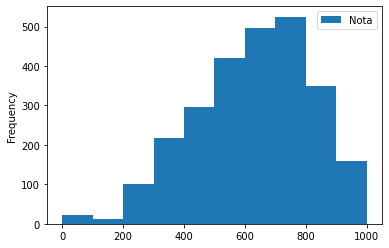

In [20]:
new_df_redacao = pd.DataFrame(df_redacao.iloc[dif2.index])
new_df_redacao[['Nota']].plot.hist()

In [23]:
pickle.dump(new_df_redacao, open("../ccscore/data/Corpus_Redacoes.pickle", 'wb'))


In [14]:
dif_selecionado_neg = comp_notas[ (comp_notas['diferenca'] < 0.0) & (comp_notas['diferenca_abs'] < 80.0)] 
dif_selecionado_neg = dif_selecionado_neg.sort_values(by='diferenca')
dif_selecionado_neg

,Competência 4,coesao calculada,diferenca,diferenca_abs
3858,0.0,79.55,-79.55,79.55
4808,0.0,79.55,-79.55,79.55
3656,50.0,129.17,-79.17,79.17
1680,100.0,179.17,-79.17,79.17
4607,50.0,129.17,-79.17,79.17
...,...,...,...,...
1393,50.0,50.68,-0.68,0.68
4230,50.0,50.60,-0.60,0.60
3279,50.0,50.60,-0.60,0.60
1621,100.0,100.60,-0.60,0.60


In [15]:
dif_selecionado_pos = comp_notas[ (comp_notas['diferenca'] >= 0.0) & (comp_notas['diferenca_abs'] < 80.0) ] 
dif_selecionado_pos = dif_selecionado_pos.sort_values(by = 'diferenca')
dif_selecionado_pos

,Competência 4,coesao calculada,diferenca,diferenca_abs
1092,150.0,150.00,0.00,0.00
2537,100.0,100.00,0.00,0.00
4810,150.0,150.00,0.00,0.00
3657,100.0,100.00,0.00,0.00
3734,100.0,100.00,0.00,0.00
...,...,...,...,...
4651,100.0,20.28,79.72,79.72
3700,100.0,20.28,79.72,79.72
2035,150.0,70.14,79.86,79.86
2168,150.0,70.08,79.92,79.92


Total de linhas: 2607


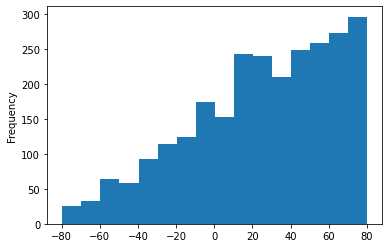

In [16]:
import math
l_bins = list(range(-200,220,20))
w = 10
l_bins = math.ceil((dif_selecionado['diferenca'].max() - dif_selecionado['diferenca'].min())/w)
dif_selecionado['diferenca'].plot.hist(bins = l_bins)
print(f"Total de linhas: {dif_selecionado.shape[0]}")

Acima, temos uma ocorrência muito mais de diferenças positivas. Ou seja, a valoração da coesão, quando comparada com o resultado definido por um humano, está em sua maioria, acima dos valores definidos pelo avaliador humano. 

In [39]:
def annotate_df(row):  
    #ax.annotate(row.name, row.values,
    #            xytext=(10,-5), 
    #            textcoords='offset points',
    #            size=18, 
    #            color='darkslategrey')
    ax.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


NameError: name 'label' is not defined

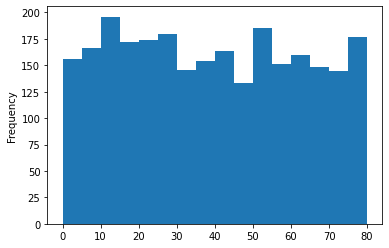

In [43]:
ax = dif_selecionado['diferenca_abs'].plot.hist(bins = l_bins)
_ = dif_selecionado.apply(annotate_df, axis=1)

Acima temos uma distribuição dos valores absolutos da diferença entre os valores atribuidos pelos corretores humanos e o processo avaliação automática. 


In [18]:
dif_selecionado.describe()

,Competência 4,coesao calculada,diferenca,diferenca_abs
count,2607.000000,2607.000000,2607.000000,2607.000000
mean,103.927886,79.080771,24.847115,39.105550
std,37.514788,29.161932,38.058907,23.157408
min,0.000000,15.000000,-79.550000,0.000000
25%,100.000000,58.930000,-0.600000,18.750000
50%,100.000000,77.780000,29.170000,38.540000
75%,150.000000,95.725000,56.940000,59.380000
max,200.000000,193.750000,79.950000,79.950000


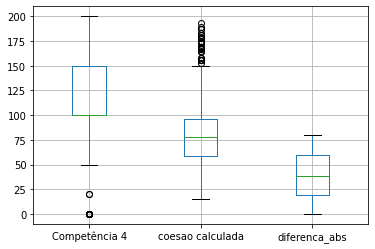

In [19]:
boxplot = dif_selecionado.boxplot(column=['Competência 4', 'coesao calculada', 'diferenca_abs'])

<AxesSubplot:ylabel='Frequency'>

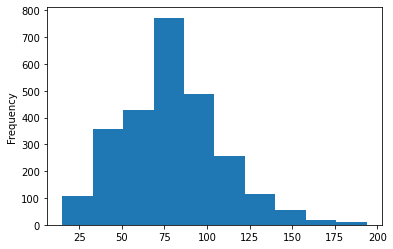

In [32]:
dif_selecionado['coesao calculada'].plot.hist(bins = 10)

<AxesSubplot:ylabel='Frequency'>

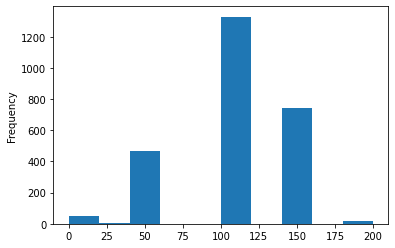

In [33]:
dif_selecionado['Competência 4'].plot.hist(bins = 10)

In [22]:
dif_zero = comp_notas[comp_notas['diferenca'] == 0.0]
print(f"Total de linhas: {dif_zero.shape[0]}")
dif_zero


Total de linhas: 31


,Competência 4,coesao calculada,diferenca,diferenca_abs
320,150.0,150.0,0.0,0.0
457,150.0,150.0,0.0,0.0
485,100.0,100.0,0.0,0.0
886,100.0,100.0,0.0,0.0
1041,50.0,50.0,0.0,0.0
1092,150.0,150.0,0.0,0.0
1233,150.0,150.0,0.0,0.0
1641,150.0,150.0,0.0,0.0
1760,100.0,100.0,0.0,0.0
2007,100.0,100.0,0.0,0.0


In [23]:
dif_menor30 = comp_notas[(comp_notas['diferenca'] <= 30.0) & (comp_notas['diferenca'] != 0.0) ]
dif_menor30

,Competência 4,coesao calculada,diferenca,diferenca_abs
0,50.0,133.75,-83.75,83.75
1,100.0,73.81,26.19,26.19
2,50.0,100.00,-50.00,50.00
4,50.0,26.39,23.61,23.61
5,50.0,38.97,11.03,11.03
...,...,...,...,...
5052,50.0,51.88,-1.88,1.88
5053,100.0,110.00,-10.00,10.00
5058,50.0,76.79,-26.79,26.79
5059,100.0,70.00,30.00,30.00


In [24]:
dif_menor50 = comp_notas[(comp_notas['diferenca'] <= 50.0) & (comp_notas['diferenca'] > 30.0)]
dif_menor50

,Competência 4,coesao calculada,diferenca,diferenca_abs
3,100.0,59.48,40.52,40.52
6,100.0,65.00,35.00,35.00
21,100.0,53.79,46.21,46.21
32,100.0,69.58,30.42,30.42
46,100.0,66.67,33.33,33.33
...,...,...,...,...
5043,100.0,60.83,39.17,39.17
5044,100.0,69.70,30.30,30.30
5046,100.0,61.14,38.86,38.86
5061,100.0,59.85,40.15,40.15


In [25]:
dif_menor75 = comp_notas[ (comp_notas['diferenca'] <= 75.0) & (comp_notas['diferenca'] > 50.0) ]
dif_menor75

,Competência 4,coesao calculada,diferenca,diferenca_abs
8,100.0,37.92,62.08,62.08
18,100.0,41.29,58.71,58.71
24,150.0,78.12,71.88,71.88
25,150.0,94.05,55.95,55.95
36,100.0,48.98,51.02,51.02
...,...,...,...,...
5060,100.0,47.81,52.19,52.19
5062,150.0,85.26,64.74,64.74
5066,150.0,85.61,64.39,64.39
5069,100.0,49.36,50.64,50.64


In [26]:
dif_maior50_menor100 = comp_notas[ (comp_notas['diferenca'] > 75.0) & (comp_notas['diferenca'] < 100.0)] 
dif_maior50_menor100

,Competência 4,coesao calculada,diferenca,diferenca_abs
9,150.0,52.27,97.73,97.73
26,100.0,20.00,80.00,80.00
27,100.0,18.33,81.67,81.67
30,150.0,61.25,88.75,88.75
48,150.0,73.08,76.92,76.92
...,...,...,...,...
5009,150.0,69.85,80.15,80.15
5034,150.0,52.50,97.50,97.50
5047,100.0,19.17,80.83,80.83
5063,150.0,72.02,77.98,77.98


In [27]:
dif_maior100 = comp_notas[ comp_notas['diferenca'] >= 100.0] 
dif_maior100

,Competência 4,coesao calculada,diferenca,diferenca_abs
19,150.0,50.00,100.00,100.00
20,150.0,30.36,119.64,119.64
23,150.0,28.65,121.35,121.35
31,150.0,45.42,104.58,104.58
40,200.0,86.67,113.33,113.33
...,...,...,...,...
5014,150.0,41.18,108.82,108.82
5050,200.0,57.74,142.26,142.26
5055,150.0,18.39,131.61,131.61
5068,150.0,35.26,114.74,114.74


In [28]:
dif_maior190 = comp_notas[ (comp_notas['coesao calculada'] >= 150.0) & (comp_notas['Competência 4'] >= 150.0) ] 
dif_maior190

,Competência 4,coesao calculada,diferenca,diferenca_abs
149,150.0,187.50,-37.50,37.50
291,150.0,155.56,-5.56,5.56
295,150.0,188.89,-38.89,38.89
320,150.0,150.00,0.00,0.00
397,150.0,187.50,-37.50,37.50
457,150.0,150.00,0.00,0.00
673,150.0,172.73,-22.73,22.73
773,150.0,153.12,-3.12,3.12
792,150.0,183.33,-33.33,33.33
1092,150.0,150.00,0.00,0.00


In [29]:
nlp = spacy.load('pt_core_news_lg')